# **Downloading Dataset**

In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files

In [3]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"youssef25","key":"6153cdd90eb541b81bcb2680187f26a3"}'}

In [4]:
!mkdir ~/.kaggle

In [5]:
!cp kaggle.json ~/.kaggle/

In [6]:
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
!pwd

/content


In [8]:
!mkdir dataset

In [9]:
%cd /content/dataset

/content/dataset


In [10]:
!pwd

/content/dataset


In [11]:
!kaggle competitions download -c tensorflow-speech-recognition-challenge

100% 3.50G/3.50G [00:32<00:00, 141MB/s]
100% 3.50G/3.50G [00:32<00:00, 117MB/s]


In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Extracting** **Dataset**

In [13]:
!7z x /content/dataset/tensorflow-speech-recognition-challenge.zip


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/dataset/                           1 file, 3763443908 bytes (3590 MiB)

Extracting archive: /content/dataset/tensorflow-speech-recognition-challenge.zip
--
Path = /content/dataset/tensorflow-speech-recognition-challenge.zip
Type = zip
Physical Size = 3763443908

  0%      1% 2 - test.7z                  2% 2 - test.7z                  3% 2 - test.7z                  4% 2 - test.7z                  5% 2 - test.7z                  6% 2 - test.7z                  7% 2 - test.7z 

In [14]:
!7z x train.7z


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 1121103842 bytes (1070 MiB)

Extracting archive: train.7z
--
Path = train.7z
Type = 7z
Physical Size = 1121103842
Headers Size = 389133
Method = Delta LZMA2:24
Solid = +
Blocks = 2

  0%      0% 38 - train/audio/_background_noise_/doing_the_dishes.wav                                                               0% 40 - train/audio/_background_noise_/exercise_bike.wav                                                            0% 42 - train/audio/_background_noise_/running_ta

In [15]:
%cd /content/dataset/


/content/dataset


# **Constructing validation and test IDs list**

In [5]:
import librosa   #for audio processing
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile #for audio processing
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from keras.layers import Dense, Dropout, Flatten, Conv1D, Input, MaxPooling1D
#We use 1 dimensional arrays due to audio files, we use Conv1D and MaxPooling1D
#Dense is used for connecting the entire neural network
#Flattening is the process of converting all the resultant 1D arrays into a single long continuous linear vector
#A dropout layer is used for regularization where you randomly set some of the dimensions of your input vector to be zero
from keras.models import Model #Used to instantiate a Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K

In [6]:
import os 
train_audio_path = '/content/dataset/train/audio/'
labels = os.listdir(train_audio_path)

In [7]:
no_of_recordings=[]
for label in labels:
    if label == '_background_noise_':
      continue
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    no_of_recordings.append(len(waves))
print(len(no_of_recordings))

30


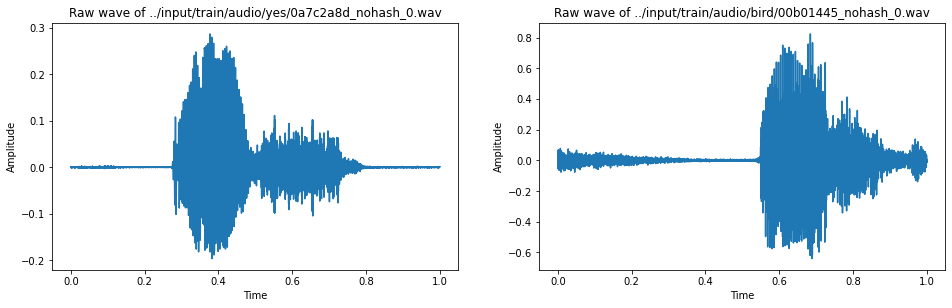

In [8]:
samples, sample_rate = librosa.load(train_audio_path+'yes/0a7c2a8d_nohash_0.wav', sr = 16000)
samples2, sample_rate = librosa.load(train_audio_path+'bird/00b01445_nohash_0.wav', sr = 16000)
fig = plt.figure(figsize=(16, 10)) #FigSize determines the pixels of the plot
ax1= fig.add_subplot(2,2,1) #Subplot grid parameter of 2x1 at the top left of the plot
ax1.set_title('Raw wave of ' + '../input/train/audio/yes/0a7c2a8d_nohash_0.wav')
ax1.set_xlabel('Time')
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0, sample_rate/len(samples), sample_rate), samples)
ax2= fig.add_subplot(2,2,2)
ax2.set_title('Raw wave of ' + '../input/train/audio/bird/00b01445_nohash_0.wav')
ax2.set_xlabel('Time')
ax2.set_ylabel('Amplitude')
ax2.plot(np.linspace(0, sample_rate/len(samples2), sample_rate), samples2)

In [9]:
import IPython.display as ipd
ipd.Audio(train_audio_path+'yes/0a7c2a8d_nohash_0.wav', rate=16000)

# **Preprocessing**

(array([6.4721e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 5.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 0.3715625 ,  9.85271875, 19.333875  , 28.81503125, 38.2961875 ,
        47.77734375, 57.2585    , 66.73965625, 76.2208125 , 85.70196875,
        95.183125  ]),
 <a list of 10 Patch objects>)

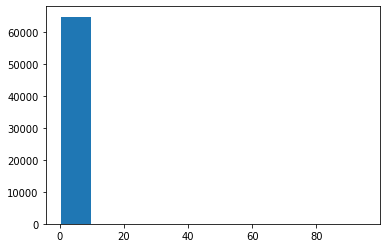

In [10]:
from scipy.io import wavfile #for audio processing
from matplotlib import pyplot as plt
import numpy as np
duration_of_recordings = []
for label in labels:
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    for wav in waves:
        sample_rate, samples = wavfile.read(train_audio_path + '/' + label + '/' + wav)
        duration_of_recordings.append(float(len(samples)/sample_rate))
    
plt.hist(np.array(duration_of_recordings))

In [11]:
print(samples)

[60 63 62 ... 76 73 68]


In [12]:
lst = []
x = [10 ,6 ,23]
lst.append(x+[0]*(10-len(x)))
print(lst)

[[10, 6, 23, 0, 0, 0, 0, 0, 0, 0]]


In [14]:
all_wave = []
all_label = []
for label in labels:
    print(label)
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    for wav in waves:
        samples, sample_rate = librosa.load(train_audio_path + '/' + label + '/' + wav, sr = 16000)
        samples = librosa.resample(samples, sample_rate, 8000)
        if(len(samples) == 8000) : 
            all_wave.append(samples)
            all_label.append(label)

on
two
six
tree
nine
stop
up
left
bed
yes
eight
go
one
no
house
sheila
happy
four
five
seven
dog
bird
three
cat
off
wow
_background_noise_
down
right
zero
marvin


In [15]:
print(all_wave[5000])
print(all_wave[5000].shape)
ipd.Audio(all_wave[5000], rate=8000)

[-0.00025404 -0.00063306 -0.00062527 ...  0.00043197  0.00067983
  0.00049207]
(8000,)


In [16]:
le = LabelEncoder()
y=le.fit_transform(all_label)

In [17]:
classes= list(le.classes_)
print(len(classes))

30


In [18]:
from keras.utils import np_utils
y=np_utils.to_categorical(y, num_classes=len(labels))
all_wave = np.array(all_wave).reshape(-1,8000,1)


In [19]:
print(all_wave.shape)

(58252, 8000, 1)


# **Model development**

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(np.array(all_wave),np.array(y),stratify=y,test_size = 0.2,random_state=777,shuffle=True)

In [21]:
K.clear_session()

inputs = Input(shape=(8000,1))

#First Conv1D layer
conv = Conv1D(8,13, padding='valid', activation='relu', strides=1)(inputs)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Second Conv1D layer
conv = Conv1D(16, 11, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Third Conv1D layer
conv = Conv1D(32, 9, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Fourth Conv1D layer
conv = Conv1D(64, 7, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Flatten layer
conv = Flatten()(conv)

#Dense Layer 1
conv = Dense(256, activation='relu')(conv)
conv = Dropout(0.3)(conv)

#Dense Layer 2
conv = Dense(128, activation='relu')(conv)
conv = Dropout(0.3)(conv)

outputs = Dense(len(labels), activation='softmax')(conv)

model = Model(inputs, outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 8000, 1)]         0         
                                                                 
 conv1d (Conv1D)             (None, 7988, 8)           112       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 2662, 8)          0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 2662, 8)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 2652, 16)          1424      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 884, 16)          0         
 1D)                                                         

In [22]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, min_delta=0.0001) 
mc = ModelCheckpoint('best_model.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')
history=model.fit(x_train, y_train ,epochs=10, callbacks=[es,mc], batch_size=32, validation_data=(x_val,y_val))

Epoch 1/10
1457/1457 [==============================] - ETA: 0s - loss: 2.7955 - accuracy: 0.1707

1457/1457 [==============================] - 384s 263ms/step - loss: 2.7955 - accuracy: 0.1707 - val_loss: 2.0412 - val_accuracy: 0.3857
Epoch 2/10
1457/1457 [==============================] - ETA: 0s - loss: 2.0218 - accuracy: 0.3658

1457/1457 [==============================] - 377s 259ms/step - loss: 2.0218 - accuracy: 0.3658 - val_loss: 1.7993 - val_accuracy: 0.4505
Epoch 3/10
1457/1457 [==============================] - ETA: 0s - loss: 1.7554 - accuracy: 0.4499

1457/1457 [==============================] - 377s 259ms/step - loss: 1.7554 - accuracy: 0.4499 - val_loss: 1.5263 - val_accuracy: 0.5367
Epoch 4/10
1457/1457 [==============================] - ETA: 0s - loss: 1.5596 - accuracy: 0.5075

1457/1457 [==============================] - 379s 260ms/step - loss: 1.5596 - accuracy: 0.5075 - val_loss: 1.2967 - val_accuracy: 0.6064
Epoch 5/10
1457/1457 [==============================] - ETA: 0s - loss: 1.4055 - accuracy: 0.5604

1457/1457 [==============================] - 405s 278ms/step - loss: 1.4055 - accuracy: 0.5604 - val_loss: 1.1593 - val_accuracy: 0.6532
Epoch 6/10
1457/1457 [==============================] - ETA: 0s - loss: 1.2731 - accuracy: 0.6039

1457/1457 [==============================] - 396s 272ms/step - loss: 1.2731 - accuracy: 0.6039 - val_loss: 1.0105 - val_accuracy: 0.7010
Epoch 7/10
1457/1457 [==============================] - ETA: 0s - loss: 1.1930 - accuracy: 0.6301

1457/1457 [==============================] - 382s 262ms/step - loss: 1.1930 - accuracy: 0.6301 - val_loss: 0.9908 - val_accuracy: 0.7120
Epoch 8/10
1457/1457 [==============================] - ETA: 0s - loss: 1.1254 - accuracy: 0.6525

1457/1457 [==============================] - 379s 260ms/step - loss: 1.1254 - accuracy: 0.6525 - val_loss: 0.9655 - val_accuracy: 0.7159
Epoch 9/10
1457/1457 [==============================] - ETA: 0s - loss: 1.0693 - accuracy: 0.6687

1457/1457 [==============================] - 376s 258ms/step - loss: 1.0693 - accuracy: 0.6687 - val_loss: 0.9443 - val_accuracy: 0.7199
Epoch 10/10
1457/1457 [==============================] - ETA: 0s - loss: 1.0189 - accuracy: 0.6859

1457/1457 [==============================] - 374s 256ms/step - loss: 1.0189 - accuracy: 0.6859 - val_loss: 0.8360 - val_accuracy: 0.7520


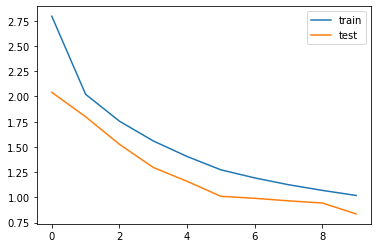

In [23]:
plt.plot(history.history['loss'], label='train') 
plt.plot(history.history['val_loss'], label='test') 
plt.legend()
plt.show()

In [32]:
!ls

dataset  drive	kaggle.json  sample_data


In [27]:
def predict(audio):
    prob=model.predict(audio.reshape(1,8000,1))
    index=np.argmax(prob[0])
    return classes[index]

# **Testing model**

In [28]:
import random
index=random.randint(0,len(x_val)-1)
samples=x_val[index].ravel()
print("Audio:",classes[np.argmax(y_val[index])])
ipd.Audio(samples, rate=8000)
print("Text:",predict(samples))

Audio: left
Text: left


In [29]:
print("Text:",predict(samples))

Text: left


In [38]:
!pip install sounddevice

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [52]:
filepath='/content/dataset/train/audio/dog'
samples, sample_rate = librosa.load(filepath + '/' + '4c7c95de_nohash_1.wav', sr = 16000)
samples = librosa.resample(samples, sample_rate, 8000)
ipd.Audio(samples,rate=8000) 

In [53]:
predict(samples)

'dog'

In [ ]:
model.save("Speech_Recognition")

In [54]:
!7z x /content/dataset/test.7z


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/dataset/                           1 file, 2640679130 bytes (2519 MiB)

Extracting archive: /content/dataset/test.7z
--
Path = /content/dataset/test.7z
Type = 7z
Physical Size = 2640679130
Headers Size = 1345163
Method = Delta LZMA2:24
Solid = +
Blocks = 3

  0%      0% 113 - test/audio/clip_002acb941.wav                                          0% 231 - test/audio/clip_005d8316e.wav                                          0% 351 - test/audio/clip_009286b17.wav                      

In [58]:
test_sample = '/content/test/audio/clip_00049951d.wav'
samples, sample_rate = librosa.load(test_sample, sr = 16000)
samples = librosa.resample(samples, sample_rate, 8000)
ipd.Audio(test_sample , rate=8000)

In [59]:
predict(samples)

'one'